In [1]:
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape
from tensorflow.keras import preprocessing

import numpy as np
import pandas as pd

# Setting random seed for reproducibility
np.random.seed(10)

# Print TensorFlow version
print(tf.__version__)


2.17.0


In [3]:
data = pd.read_csv('colors.csv')
data.head()
names = data['name'].tolist()

In [4]:
len(data)

14157

In [5]:
names = data["name"]

## Visualize the name string length distribution

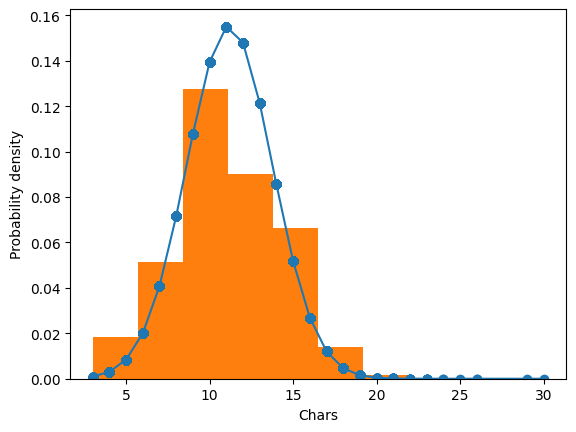

In [6]:
h = sorted(names.str.len().values)
import numpy as np
import scipy.stats as stats
import pylab as plt

fit = stats.norm.pdf(h, np.mean(h), np.std(h)*0.8)  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,density=True)      #use this to draw histogram of your data
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [7]:
np.array(h).max()

30

## Tokenize, char level

In [8]:
maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)

## One-hot encoding

In [9]:
from tensorflow.keras.utils import to_categorical
one_hot_names = to_categorical(padded_names)
num_classes = one_hot_names.shape[-1]
num_classes

28

In [10]:
one_hot_names.shape

(14157, 25, 28)

In [11]:
t.word_index

{'e': 1,
 'a': 2,
 'r': 3,
 ' ': 4,
 'i': 5,
 'n': 6,
 'l': 7,
 'o': 8,
 't': 9,
 's': 10,
 'c': 11,
 'u': 12,
 'd': 13,
 'g': 14,
 'p': 15,
 'h': 16,
 'm': 17,
 'b': 18,
 'y': 19,
 'w': 20,
 'k': 21,
 'f': 22,
 'v': 23,
 'z': 24,
 'q': 25,
 'j': 26,
 'x': 27}

In [12]:
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])


In [13]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Define the input shape explicitly using Input()
input_layer = Input(shape=(maxlen, num_classes))

# Build the model
model = Sequential()
model.add(input_layer)  # First input layer
model.add(LSTM(256, return_sequences=True))  # Add LSTM layers without input_shape argument
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 25, 256)             │         291,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505,859 (1.93 MB)

 Trainable params: 505,859 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.load_weights('model_1.weights.h5')

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [15]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - acc: 0.8252 - loss: 0.0059 - val_acc: 0.6780 - val_loss: 0.0496
Epoch 2/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - acc: 0.8240 - loss: 0.0061 - val_acc: 0.6992 - val_loss: 0.0497
Epoch 3/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - acc: 0.8259 - loss: 0.0059 - val_acc: 0.6928 - val_loss: 0.0505
Epoch 4/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - acc: 0.8243 - loss: 0.0054 - val_acc: 0.6829 - val_loss: 0.0493
Epoch 5/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - acc: 0.8337 - loss: 0.0057 - val_acc: 0.6843 - val_loss: 0.0507
Epoch 6/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - acc: 0.8300 - loss: 0.0052 - val_acc: 0.6843 - val_loss: 0.0498
Epoch 7/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - acc: 0.8323 - loss: 0.0054 - val_acc: 0.6843 - val_loss: 0.0501
Epoch 8/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - acc: 0.8399 - loss: 0.0053 - val_acc: 0.6758 - val_loss: 0.0496
Epoch 9/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
# Save the model parameters for later use.
model.save_weights('model_1.weights.h5')

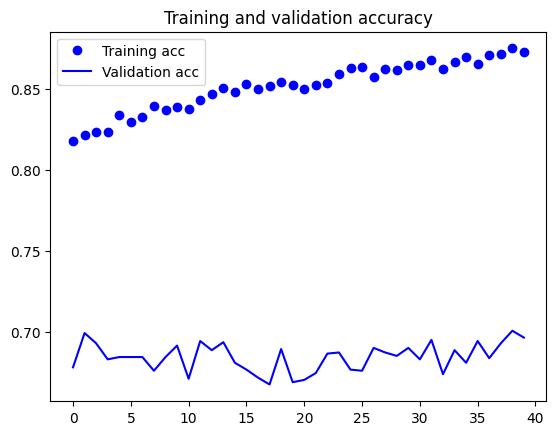

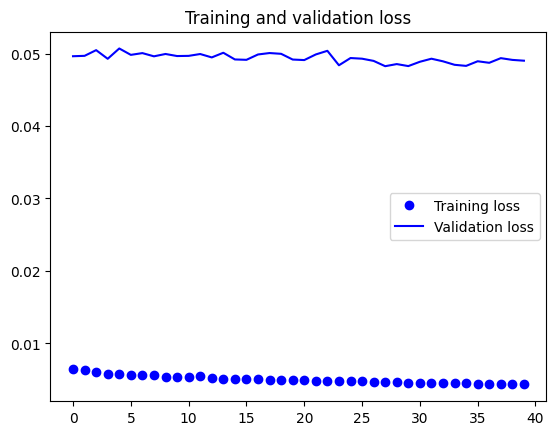

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [18]:
# Plot a color image.
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [19]:
def scale(n):
    return int(n * 255) 

In [20]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence  # Add this if you haven't already

def predict(name):
    # Input validation
    if not isinstance(name, str) or len(name) == 0:
        raise ValueError("Input should be a non-empty string.")

    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = sequence.pad_sequences(tokenized, maxlen=maxlen)

    # One-hot encoding
    one_hot = to_categorical(padded, num_classes=num_classes)

    try:
        pred = model.predict(np.array(one_hot))[0]
    except Exception as e:
        print(f"Error during prediction: {e}")
        return

    # Assuming pred contains RGB values
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r, g, b)
    plot_rgb(pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
light blue, R,G,B: 162 210 245


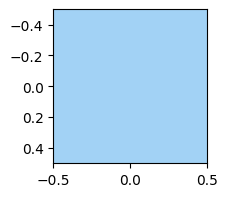

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
blue, R,G,B: 15 34 181


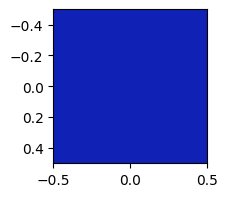

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
dark blue, R,G,B: 8 15 109


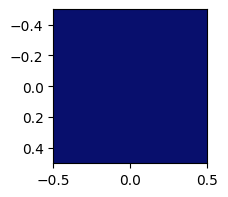

In [21]:
predict("light blue")
predict("blue")
predict("dark blue")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
black, R,G,B: 24 24 21


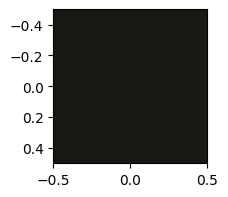

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
white, R,G,B: 243 239 229


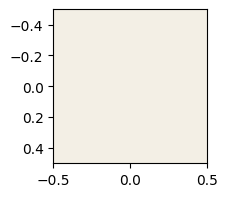

In [22]:
predict("black")
predict("white")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
tensorflow orange, R,G,B: 245 128 52


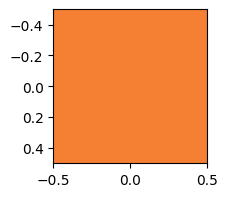

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
forest, R,G,B: 18 75 22


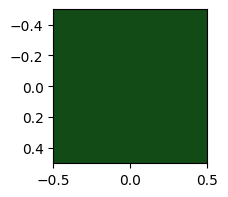

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
evergreen, R,G,B: 22 64 31


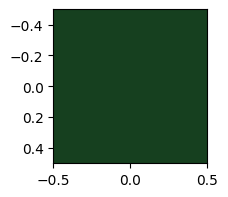

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
tangerine, R,G,B: 243 137 36


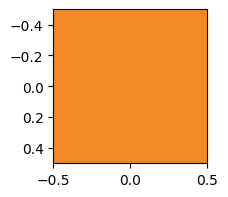

In [23]:
predict("tensorflow orange")
predict("forest")
predict("evergreen")
predict("tangerine")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
princess ivory, R,G,B: 236 229 203


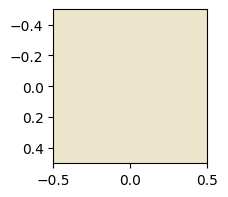

In [24]:
predict("princess ivory")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
bull cream, R,G,B: 228 218 215


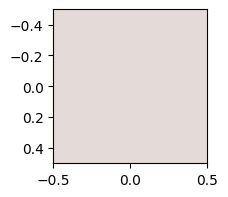

In [25]:
predict("bull cream")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
keras red, R,G,B: 152 53 43


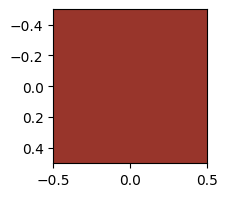

In [26]:
predict("keras red")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
tensorflow orange, R,G,B: 245 128 52


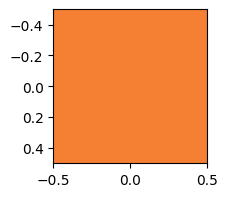

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
forest, R,G,B: 18 75 22


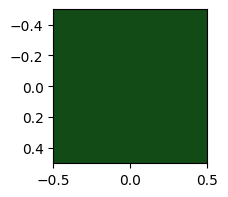

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
bull cream, R,G,B: 228 218 215


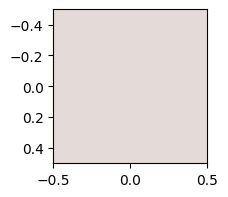

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
keras red, R,G,B: 152 53 43


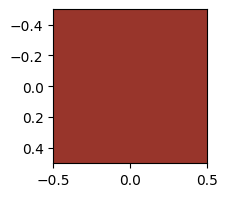

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
lavender, R,G,B: 177 161 229


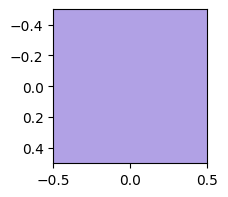

In [27]:
predict("tensorflow orange")
predict("forest")
predict("bull cream")
predict("keras red")
predict("lavender")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
navy blue, R,G,B: 13 23 105


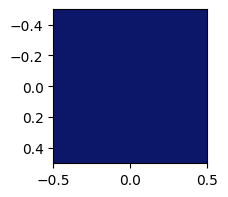

In [28]:
predict("navy blue")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
khaki, R,G,B: 162 152 96


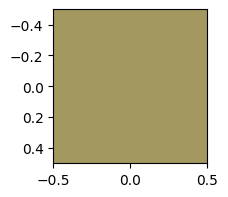

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
pista, R,G,B: 233 221 93


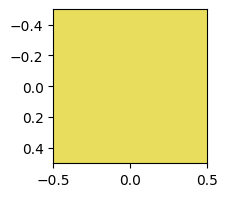

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
teal green, R,G,B: 27 136 114


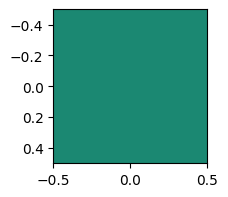

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
vermillion, R,G,B: 242 59 22


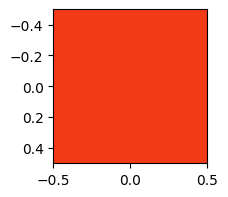

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
mauve, R,G,B: 192 132 184


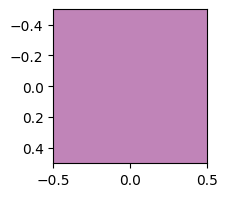

In [32]:
predict("khaki")
predict("pista")
predict("teal green")
predict("vermillion")
predict("mauve")